# Proyek Analisis Data: Bike Sharing Dataset



*   Nama        : Firman Maulana
*   Email       : mfirman4674@gmail.com
*   Id Dicoding : firmnnm



# Menentukan Pertanyaan Bisnis

*   Bagaimana performa peminjaman sepeda pada 2012?
*   Situasi dan kondisi seperti apa dengan total peminjaman sepeda tertinggi dalam 1 tahun tersebut?
*   Berapa banyak peminjam sepeda yang terdaftar sebagai pelanggan dan tidak?





# Import Semua Packages/Library yang Digunakan

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Wrangling

**Gathering Data**

Pada tahap ini dataset day.csv dan hour.csv akan diubah kedalam bentuk dataframe menggunakan library pandas

*   Day Dataset



In [42]:
day_path = '/content/drive/MyDrive/Dicoding/Data/day.csv'
day_df = pd.read_csv(day_path)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


*   Hour Dataset



In [43]:
hour_path = '/content/drive/MyDrive/Dicoding/Data/hour.csv'
hour_df = pd.read_csv(hour_path)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assessing Data


Pada tahap ini kedua dataframe akan melalui penilaian terkait kesiapan dataset sebelum dilakukan analisis

*   **Day Dataframe**



In [44]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [45]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [46]:
print("Jumlah data terduplikasi: ", day_df.duplicated().sum())

Jumlah data terduplikasi:  0


In [47]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Day Dataframe ini tidak memiliki nilai Null dan duplikat, namun pada column 'dteday' belum sesuai dengan tipe data yang seharusnya 'date' menjadi 'object'

*   **Hour Dataframe**



In [48]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [49]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [50]:
print("Jumlah data terduplikasi: ", hour_df.duplicated().sum())

Jumlah data terduplikasi:  0


In [51]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hour Dataframe ini juga tidak memiliki nilai Null dan duplikat, namun pada column 'dteday' belum sesuai dengan tipe data yang seharusnya 'date' menjadi 'object'

# Cleaning Data

Pada tahap ini, kedua dataframe akan diubah tipe data pada colum 'dteday' menjadi tipe data 'datetime'

In [52]:
datetime_columns = ["dteday"]

*   Day Dataframe



In [53]:
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [54]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

*   Hour Dataframe



In [55]:
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [56]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# **Exploratory Data Analysis (EDA)**

Pada tahap ini dataframe yang sudah dibersihkan akan dieksplorasi untuk mengenali data lebih lanjut

In [57]:
day_df = day_df[day_df['dteday'].dt.year == 2012]

In [58]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,366.000000,366,366.000000,366.0,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,548.500000,2012-07-01 12:00:00,2.494536,1.0,6.513661,0.030055,2.986339,0.683060,1.368852,0.504081,0.481852,0.612166,0.189572,1018.483607,4581.450820,5599.934426
min,366.000000,2012-01-01 00:00:00,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.107500,0.101658,0.254167,0.046650,2.000000,20.000000,22.000000
25%,457.250000,2012-04-01 06:00:00,2.000000,1.0,4.000000,0.000000,1.000000,0.000000,1.000000,0.347708,0.350685,0.508125,0.133721,429.750000,3730.500000,4369.000000
50%,548.500000,2012-07-01 12:00:00,2.500000,1.0,7.000000,0.000000,3.000000,1.000000,1.000000,0.514167,0.497779,0.611875,0.174750,904.500000,4776.500000,5927.000000
75%,639.750000,2012-09-30 18:00:00,3.000000,1.0,9.750000,0.000000,5.000000,1.000000,2.000000,0.653959,0.607646,0.711146,0.231196,1262.000000,5663.000000,7011.250000
max,731.000000,2012-12-31 00:00:00,4.000000,1.0,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.804913,0.925000,0.441563,3410.000000,6946.000000,8714.000000
std,105.799338,NaN,1.112185,0.0,3.455958,0.170971,2.006108,0.465921,0.516057,0.176112,0.156756,0.134206,0.078194,758.989897,1424.331846,1788.667868


Dapat dilihat pada rangkuman statistik diatas, data peminjaman sepeda pada tahun 2012 kita mendapatkan beberapa informasi seperti jumlah peminjam sepeda paling sedikit dalam satu hari adalah 22 orang dan jumlah peminjam sepeda terbanyak dalam satu hari adalah 8714 orang dengan standar deviasinya sebesar 1788.667868

In [59]:
day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday   cnt                                
       nunique   max   min         mean          std
season                                              
1           91  7836   441  3531.296703  1341.203270
2           92  8362  1027  6209.489130  1221.345569
3           94  8714  4073  6824.244681   912.756191
4           89  8555    22  5791.865169  1598.520901

Berdasarkan output tersebut dapat disimpulkan bahwa pada tahun 2012, rata rata peminjaman sepeda tertinggi ada pada **Musim Gugur** dan terendah pada **Musim Semi**

In [60]:
hour_df = hour_df[hour_df['dteday'].dt.year == 2012]

In [61]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,8734.000000,8734,8734.000000,8734.0,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000
mean,13012.500000,2012-07-01 02:05:18.204717312,2.489810,1.0,6.501946,11.520151,0.029883,2.994733,0.681704,1.413098,0.504825,0.482481,0.611193,0.189034,42.679757,191.986604,234.666361
min,8646.000000,2012-01-01 00:00:00,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.160000,0.000000,0.000000,0.000000,1.000000
25%,10829.250000,2012-04-01 00:00:00,2.000000,1.0,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.460000,0.104500,5.000000,46.000000,53.000000
50%,13012.500000,2012-07-01 00:00:00,2.000000,1.0,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.520000,0.484800,0.610000,0.164200,20.000000,156.000000,191.000000
75%,15195.750000,2012-09-30 00:00:00,3.000000,1.0,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.770000,0.253700,60.000000,275.000000,347.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.924200,1.000000,0.806000,367.000000,886.000000,977.000000
std,2521.432959,NaN,1.108279,0.0,3.449086,6.921208,0.170275,2.005254,0.465842,0.624470,0.186752,0.166587,0.188184,0.121490,56.970413,175.481637,208.910941


Dapat dilihat pada rangkuman statistik diatas, data peminjaman sepeda tahun 2012 kita mendapatkan beberapa informasi seperti jumlah peminjam sepeda paling sedikit dalam satu jam adalah 1 orang dan jumlah peminjam sepeda terbanyak dalam satu jam adalah 977 orang dengan standar deviasinya sebesar 208.910941

In [62]:
hour_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
           nunique  max min        mean         std
weathersit                                         
1              356  977   1  253.661581  216.904192
2              286  957   1  212.997850  191.336442
3              151  891   1  142.376176  158.703349
4                2  164  23   93.500000   99.702056

Berdasarkan output tersebut pada tahun 2012, cuaca pada hari dengan rata rata peminjaman sepeda tertinggi ada pada **cuaca cerah dan agak berawan** dan terendah pada cuaca **hujan, bersalju, petir, dan badai**.

In [63]:
hour_df.groupby(by="hr").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
   nunique  max min        mean         std
hr                                         
0      365  283   3   64.630137   46.812787
1      364  168   2   40.126374   38.183340
2      363  132   1   26.696970   30.043186
3      355   79   1   13.332394   14.634220
4      360   28   1    7.252778    4.551163
5      364   66   1   25.010989   14.263938
6      364  213   1   94.315934   60.526311
7      364  596   6  267.145604  179.431804
8      364  839  11  454.763736  257.463082
9      364  426  23  274.593407   88.763372
10     364  539   8  216.335165  107.965267
11     364  663  10  260.225275  135.495962
12     364  776  10  316.527473  150.544144
13     365  760  15  316.657534  154.846629
14     365  750  20  299.095890  156.508028
15     365  750  13  313.860274  148.168543
16     365  783  13  389.386301  141.308354
17     365  976  26  573.227397  235.268365
18     365  977  26  528.183562  232.220236
19     365  743  18  386.265753  164.504645
20     365  567  23  278.717808  122.510416
21     365  584  11  209.780822   90.737462
22     365  502  11  158.726027   72.546056
23     365  256   9  106.369863   53.514840

Peminjaman sepeda cenderung tinggi pada sore hari (jam 17-18) dan rendah pada dini hari (jam 3-5)

# Visualization & Explanatory Analysis

**Pertanyaan 1:**

Bagaimana performa peminjaman sepeda pada tahun 2012?

In [64]:
#Mapping data
main_df = hour_df.copy()
mapping_yr = {1: '2012'}
mapping_mnth = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
mapping_season = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
mapping_weathersit = {1: 'Clear', 2: 'Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Ice Pallets'}

# Terapkan mapping
main_df['yr'] = main_df['yr'].map(mapping_yr)
main_df['mnth'] = main_df['mnth'].map(mapping_mnth)
main_df['weekday'] = main_df['dteday'].dt.day_name()
main_df['season'] = main_df['season'].map(mapping_season)
main_df['weathersit'] = main_df['weathersit'].map(mapping_weathersit)
main_df = main_df[['dteday', 'yr', 'mnth', 'hr', 'weekday', 'season', 'weathersit', 'cnt', 'registered', 'casual']]

main_df

,dteday,yr,mnth,hr,weekday,season,weathersit,cnt,registered,casual
8645,2012-01-01,2012,January,0,Sunday,Spring,Clear,48,43,5
8646,2012-01-01,2012,January,1,Sunday,Spring,Clear,93,78,15
8647,2012-01-01,2012,January,2,Sunday,Spring,Clear,75,59,16
8648,2012-01-01,2012,January,3,Sunday,Spring,Clear,52,41,11
8649,2012-01-01,2012,January,4,Sunday,Spring,Clear,8,8,0
...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,2012,December,19,Monday,Spring,Cloudy,119,108,11
17375,2012-12-31,2012,December,20,Monday,Spring,Cloudy,89,81,8
17376,2012-12-31,2012,December,21,Monday,Spring,Clear,90,83,7
17377,2012-12-31,2012,December,22,Monday,Spring,Clear,61,48,13


In [65]:
# Statistik performa peminjaman sepeda pada tahun 2012
stats_2012 = {
    "Total Peminjaman": main_df['cnt'].sum(),
    "Total Casual Users": main_df['casual'].sum(),
    "Total Registered Users": main_df['registered'].sum(),
    "Rata-Rata Peminjaman": main_df['cnt'].mean(),
    "Peminjaman Maksimum": main_df['cnt'].max(),
    "Peminjaman Minimum": main_df['cnt'].min()
}
print("Statistik Peminjaman Sepeda Tahun 2012:")
for key, value in stats_2012.items():
    print(f"{key}: {value}")

Statistik Peminjaman Sepeda Tahun 2012:
Total Peminjaman: 2049576
Total Casual Users: 372765
Total Registered Users: 1676811
Rata-Rata Peminjaman: 234.6663613464621
Peminjaman Maksimum: 977
Peminjaman Minimum: 1


In [66]:
# Performa bulanan
monthly_performance = main_df.groupby('mnth')[['cnt', 'casual', 'registered']].sum().sort_values(by='cnt', ascending=False)
print("\nPerforma Peminjaman Sepeda per Bulan:")
print(monthly_performance)


Performa Peminjaman Sepeda per Bulan:
              cnt  casual  registered
mnth                                 
September  218573   43778      174795
August     214503   43197      171306
July       203607   41705      161902
June       202830   43294      159536
October    198841   34538      164303
May        195865   44235      151630
April      174224   38456      135768
March      164875   31618      133257
November   152664   21009      131655
December   123713   13245      110468
February   103137    8721       94416
January     96744    8969       87775


In [67]:
# Performa berdasarkan hari kerja
weekday_performance = main_df.groupby('weekday')[['cnt', 'casual', 'registered']].mean().sort_values(by='cnt', ascending=False)
print("\nRata-Rata Peminjaman Sepeda Berdasarkan Hari:")
print(weekday_performance)


Rata-Rata Peminjaman Sepeda Berdasarkan Hari:
                  cnt     casual  registered
weekday                                     
Thursday   249.472713  31.316212  218.156501
Friday     245.019231  39.090545  205.928686
Wednesday  243.883628  29.421348  214.462279
Saturday   238.833333  75.564904  163.268429
Tuesday    234.582453  27.501219  207.081235
Monday     221.287781  31.530547  189.757235
Sunday     210.033832  63.664831  146.369001


In [68]:
# Performa berdasarkan jam
hourly_performance = main_df.groupby('hr')[['cnt', 'casual', 'registered']].mean().sort_values(by='cnt', ascending=False)
print("\nRata-Rata Peminjaman Sepeda Berdasarkan Jam:")
print(hourly_performance)


Rata-Rata Peminjaman Sepeda Berdasarkan Jam:
           cnt     casual  registered
hr                                   
17  573.227397  89.717808  483.509589
18  528.183562  72.410959  455.772603
8   454.763736  24.153846  430.609890
16  389.386301  90.671233  298.715068
19  386.265753  57.479452  328.786301
13  316.657534  89.208219  227.449315
12  316.527473  84.373626  232.153846
15  313.860274  92.446575  221.413699
14  299.095890  93.128767  205.967123
20  278.717808  42.241096  236.476712
9   274.593407  37.346154  237.247253
7   267.145604  11.728022  255.417582
11  260.225275  73.362637  186.862637
10  216.335165  56.934066  159.401099
21  209.780822  32.123288  177.657534
22  158.726027  25.120548  133.605479
23  106.369863  16.635616   89.734247
6    94.315934   4.505495   89.810440
0    64.630137  10.827397   53.802740
1    40.126374   7.247253   32.879121
2    26.696970   5.074380   21.622590
5    25.010989   1.604396   23.406593
3    13.332394   2.645070   10.687324
4   

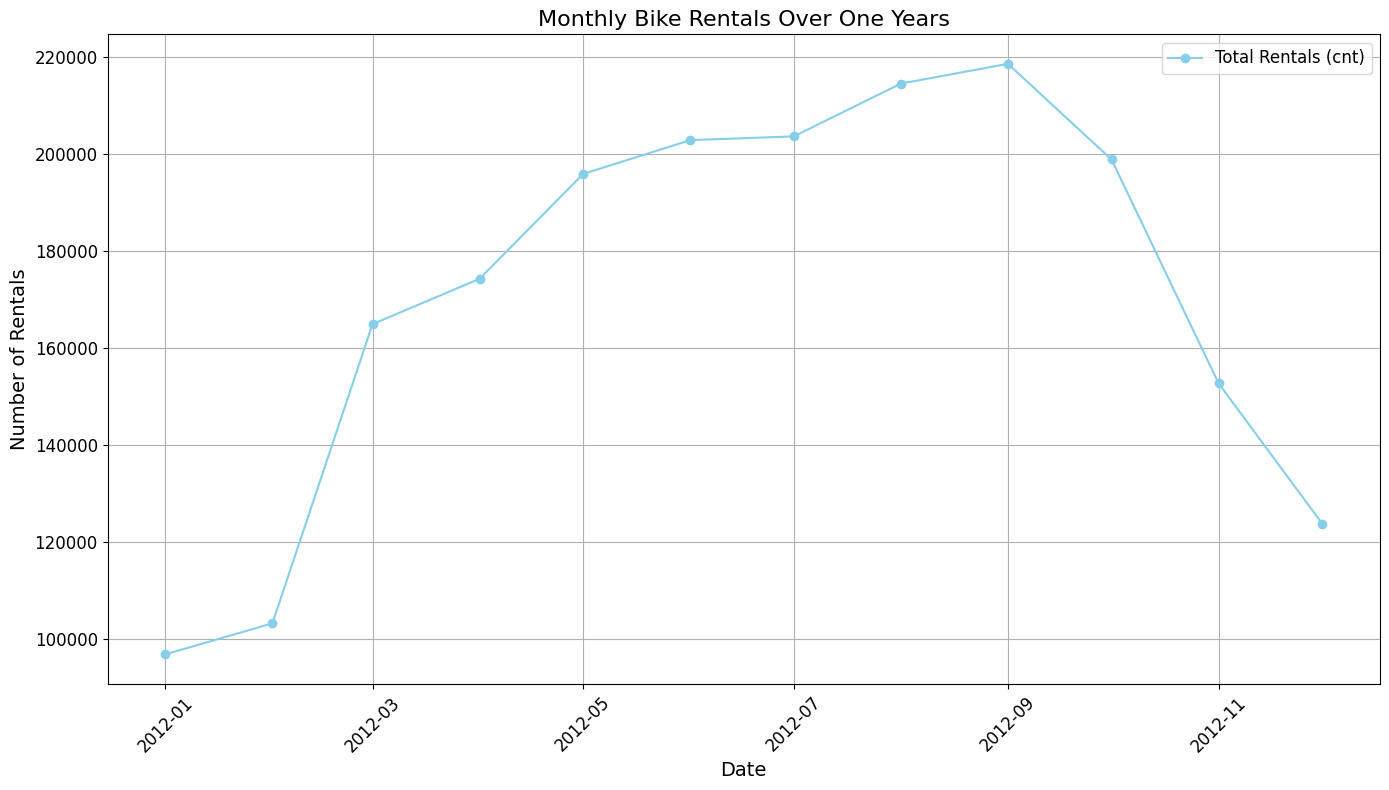

In [69]:
# Buat DataFrame monthly_rentals dari data main_df
monthly_rentals = main_df.groupby(['yr', 'mnth'])[['cnt', 'registered', 'casual']].sum().reset_index()

# Tambahkan kolom 'date' dengan format 'YYYY-MM'
monthly_rentals['date'] = monthly_rentals['yr'] + '-' + monthly_rentals['mnth']
monthly_rentals['date'] = pd.to_datetime(monthly_rentals['date'], format='%Y-%B')

# Urutkan berdasarkan kolom 'date'
monthly_rentals = monthly_rentals.sort_values('date')

# Visualisasi
plt.figure(figsize=(14, 8))
plt.plot(
    monthly_rentals['date'],
    monthly_rentals['cnt'],
    marker='o',
    label='Total Rentals (cnt)',
    color='skyblue'
)
plt.title('Monthly Bike Rentals Over One Years', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Rentals', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


Pada tahun 2012, terdapat kenaikan sangat signifikan di akhir kuartal pertama (Januari – Maret) yang terus meningkat hingga kuartal ketiga (Juli – September), namun kembali terjadi penurunan pada kuartal keempat (Oktober – Desember). Secara keseluruhan grafik peminjaman sepeda ini memiliki peningkatan yang cukup baik dengan puncak peminjaman sepeda terjadi pada pertengahan tahun (Juni - September), dengan penurunan tajam di akhir tahun (Oktober - Desember)

**Pertanyaan 2:**

Situasi dan kondisi seperti apa dengan total peminjaman sepeda tertinggi dalam 1 tahun tersebut?

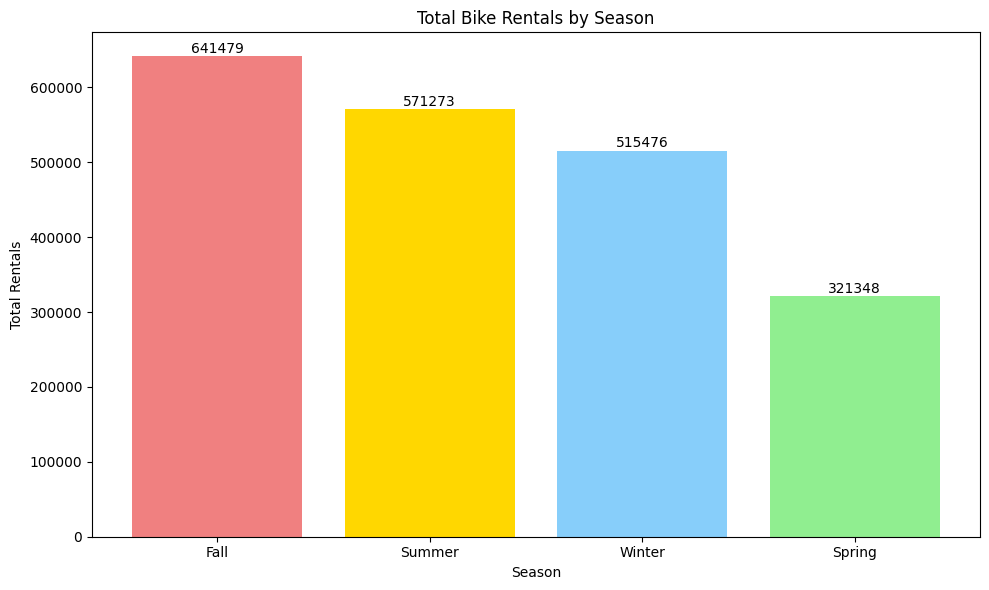

In [70]:
# Pengelompokkan total peminjaman berdasarkan musim
seasonal_counts = main_df.groupby('season').cnt.sum().sort_values(ascending=False)

# Warna untuk setiap musim
season_colors = {
    'Winter': 'lightskyblue',
    'Spring': 'lightgreen',
    'Summer': 'gold',
    'Fall': 'lightcoral'
}

# Membuat visualisasi grafik batang untuk total peminjaman per musim
plt.figure(figsize=(10, 6))
sizes = seasonal_counts.values
labels = seasonal_counts.index
colors = [season_colors[label] for label in labels]

plt.bar(labels, sizes, color=colors)

# Menambahkan label pada grafik
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Season')

# Menambahkan teks di atas setiap batang untuk menunjukkan jumlah peminjaman
for i, value in enumerate(sizes):
    plt.text(i, value + 500, str(value), ha='center', va='bottom')

# Menampilkan grafik
plt.tight_layout()
plt.show()


Diagram diatas menunjukkan **musim gugur** dan **musim panas** merupakan musim dengan jumlah peminjam sepeda tertinggi. Dan **Musim Semi** merupakan musim dengan jumlah peminjaman terendahnya

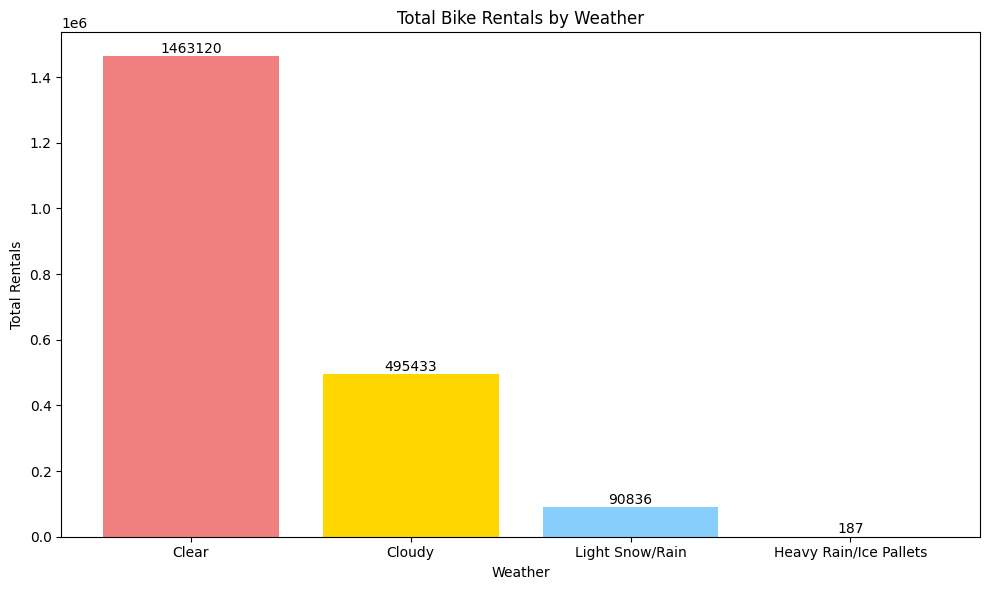

In [71]:
#Cuaca
weather_counts = main_df.groupby('weathersit').cnt.sum().sort_values(ascending=False)
weather_colors = {
    'Clear':'gold',
    'Cloudy':'lightskyblue',
    'Light Snow/Rain':'grey',
    'Heavy Rain/Ice Pallets':'darkblue'
}
sizes = weather_counts.values
labels = weather_counts.index
colors_weather = [weather_colors[label] for label in labels]

plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors)

plt.xlabel('Weather')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Weather')
for i, value in enumerate(sizes):
    plt.text(i, value + 500, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Diagram diatas menunjukkan peminjaman sepeda tertinggi terjadi pada **cuaca cerah atau sedikit berawan** dan pada **cuaca hujan atau salju** merupakan jumlah peminjaman sepeda terendahnya

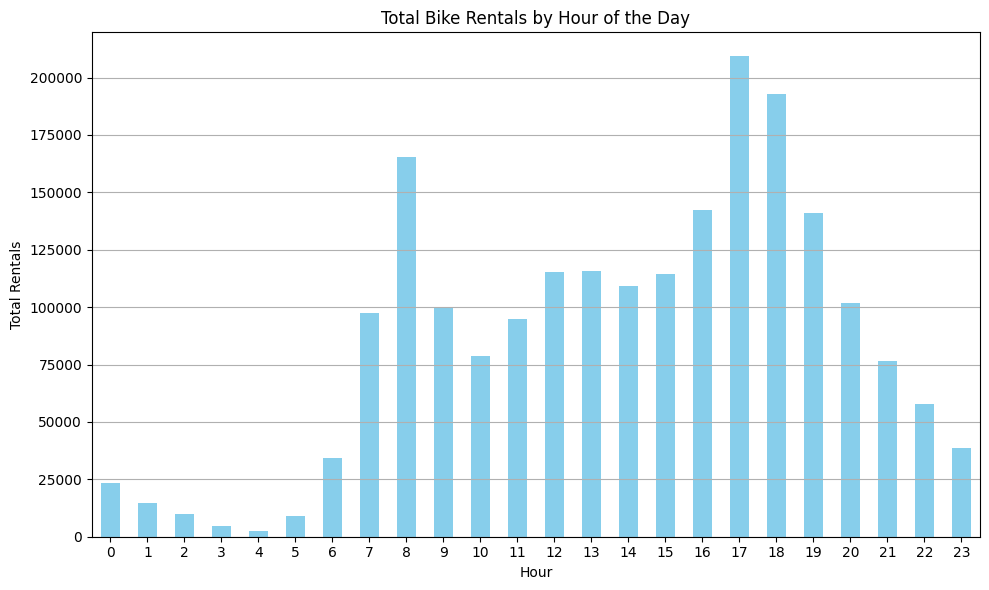

In [72]:
# Waktu
hourly_counts = main_df.groupby('hr')['cnt'].sum()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Total Bike Rentals by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Pada chart diatas menunjukkan total peminjam sepeda tertinggi pada **pukul 17:00 (pukul 5 sore)** dan **18:00 (pukul 6 sore)**. Sedangakan terendah pada **pukul 3:00 pagi** hingga **5:00 pagi**

# Analisis Lanjutan Clustering tanpa Machine Learning Algorithm

Pada analisis lanjutan ini, metode yang digunakan adalah clustering. Clustering pada analisis ini merupakan pengelompokkan data berdasarkan pada dua buah feature yaitu 'hr' dan 'weekday' yang kemudian menghitung total 'cnt' dari setiap kombinasi hari dan jam dengan tujuan melihat pola dan tren dari data yang ada dengan visualisasi berupa heatmap.

In [73]:
clustering = main_df.groupby(['weekday', 'hr'])['cnt'].sum().unstack()

clustering

hr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,3336,1585,738,412,345,1568,5877,16745,30403,16818,...,15013,16608,21692,31879,27372,19919,13913,10877,9311,7188
Monday,1882,864,540,243,323,1439,5418,15947,26957,14014,...,12152,12921,17978,31340,30190,21598,15076,10618,6954,4059
Saturday,6058,4353,3127,1384,470,504,1378,3052,7739,12654,...,25400,25108,23759,21743,18388,15098,11213,9788,8796,7332
Sunday,5896,5018,3832,1909,597,524,940,2143,5549,10073,...,22939,22335,22412,20214,17126,13950,10507,7888,5688,3649
Thursday,2505,1052,567,279,311,1732,7010,20338,32395,15572,...,11483,13127,19280,35404,33955,24240,17865,13007,9494,6280
Tuesday,1626,703,361,201,280,1543,6585,18383,29821,15077,...,10756,12007,18720,35028,33178,22709,16034,11398,8164,4880
Wednesday,2287,1031,526,305,285,1794,7123,20633,32670,15744,...,11427,12453,18285,33620,32578,23473,17124,12994,9528,5437


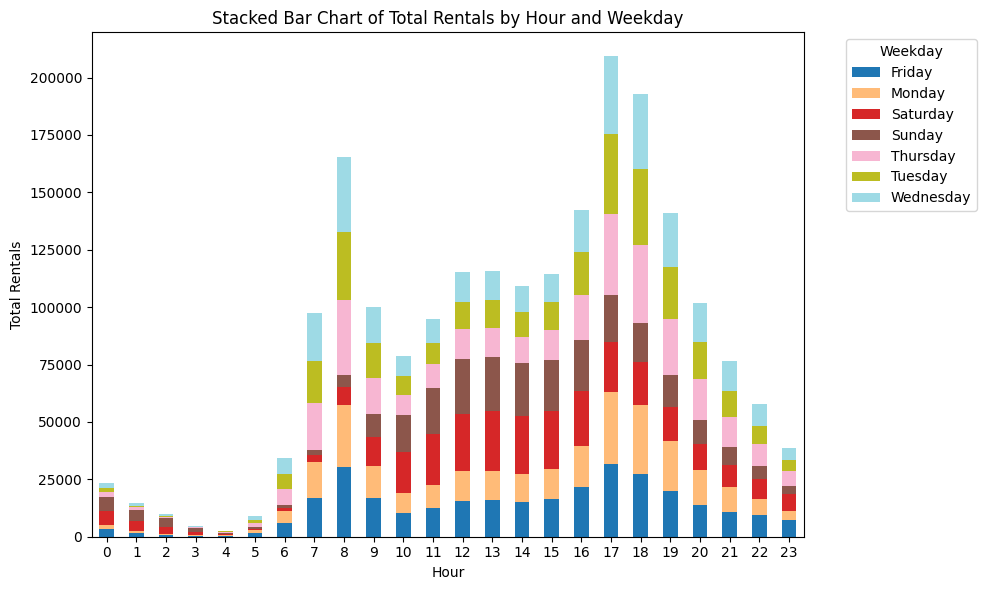

In [80]:
# Pivot data ke format yang diperlukan untuk stacked bar chart
pivot_df = main_df.pivot_table(index='hr', columns='weekday', values='cnt', aggfunc='sum')

# Membuat stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.title('Stacked Bar Chart of Total Rentals by Hour and Weekday')
plt.xticks(rotation=0)
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Berdasarkan clustering yang ditampilkan pada stacked bar diatas, dapat disimpulkan bahwa:

1. Puncak Aktivitas: Rental memuncak pada jam 8 pagi dan 5-6 sore, terutama pada hari kerja (Monday–Friday).
2. Akhir Pekan: Aktivitas rental lebih merata sepanjang hari, dengan lonjakan kecil di siang hari (jam 12-15).
3. Hari dengan Aktivitas Tertinggi: Rabu (Wednesday) dan Jumat (Friday) memiliki kontribusi terbesar pada jam sibuk.
4. Jam Rendah Aktivitas: Rental sangat rendah antara jam 00:00–06:00 untuk semua hari.



**Pertanyaan 3:**

Berapa banyak peminjam sepeda yang terdaftar sebagai pelanggan dan tidak?

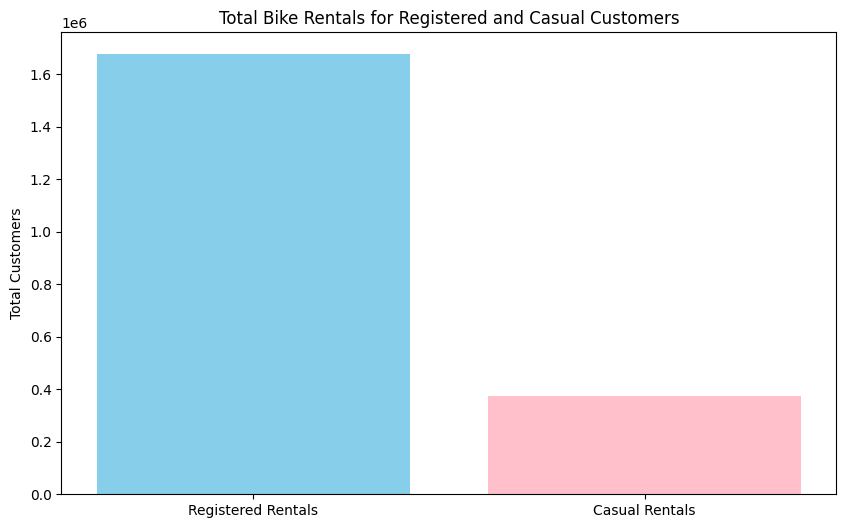

In [81]:
# Total per kategori pelanggan
total_customers = [monthly_rentals['registered'].sum(), monthly_rentals['casual'].sum()]

plt.figure(figsize=(10, 6))
plt.bar(['Registered Rentals', 'Casual Rentals'], total_customers, color=['skyblue', 'pink'])

plt.title('Total Bike Rentals for Registered and Casual Customers')
plt.ylabel('Total Customers')
plt.show()


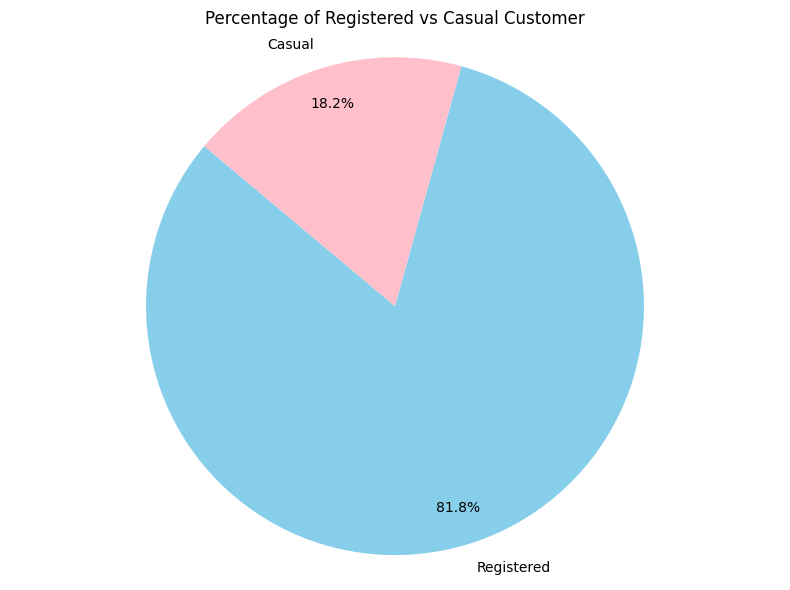

In [82]:
total_registered = main_df['registered'].sum()
total_casual = main_df['casual'].sum()
labels = ['Registered', 'Casual']
sizes = [total_registered, total_casual]
colors = ['skyblue', 'pink']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.axis('equal')
plt.title('Percentage of Registered vs Casual Customer')
plt.tight_layout()
plt.show()

Peminjam sepeda yang terdaftar jauh lebih banyak daripada peminjam casual dengan persentase 81.8%. Namun peminjam casual hanya memiliki persentase kurang dari 20% selama 1 tahun tersebut.

# Conclusion

Berdasarkan analisis data pada dataset Bike-Sharing atau Bisnis Peminjaman Sepeda, dapat disimpulkan sebagai berikut:



> Performa peminjaman sepeda pada tahun  2012 menunjukkan peningkatan yang cukup signifikan, dengan lonjakan yang lebih jelas terjadi antara kuartal 1 hingga kuartal 3, serta penurunan pada kuartal terakhir.



Beberapa kondisi dengan jumlah peminjam tertinggi adalah sebagai berikut:

- Musim Gugur mencatatkan jumlah peminjaman tertinggi dibandingkan musim lainnya.
- Cuaca cerah dan sedikit berawan menjadi kondisi cuaca dengan peminjaman sepeda paling tinggi.
- Peminjaman sepeda paling banyak terjadi antara pukul 5 hingga 6 sore dan pukul 8 pagi.
- Peminjam sepeda lebih banyak pada hari kerja, Senin hingga Jumat, sedangkan pada akhir pekan (Sabtu dan Minggu), peminjaman ramai mulai pukul 12 siang hingga 3 sore.
- Jumlah peminjam yang terdaftar lebih banyak dibandingkan peminjam biasa, hal tersebut menunjukkan bahwa bisnis ini perlu memperluas pemasaran untuk menarik lebih banyak peminjam baru, tidak hanya mengandalkan pelanggan yang sudah terdaftar.

In [ ]:
# Menyimpan dataframe 'main_df' dalam bentuk csv untuk menjadi data utama pada pembuatan dashboard

main_df.to_csv('/content/drive/MyDrive/Dicoding/Dashboard/main_data.csv', index=False)